### Note: changed the order in answering the questions to avoid re-read of dataset.

In [1]:
%tensorflow_version 1.x
from __future__ import print_function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.datasets import mnist
from keras.models import Sequential,Model
from keras.layers import Dense, Activation, InputLayer, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, UpSampling2D, Input
import os
from keras import backend as K

TensorFlow 1.x selected.


Using TensorFlow backend.


## Load MNIST dataset with KERAS
Q1 A

In [0]:
batch_size = 128
num_classes = 10 # [digits-> 0,1,....,9]
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Display first 25 images from the training dataset and display the labels along with them

Q2

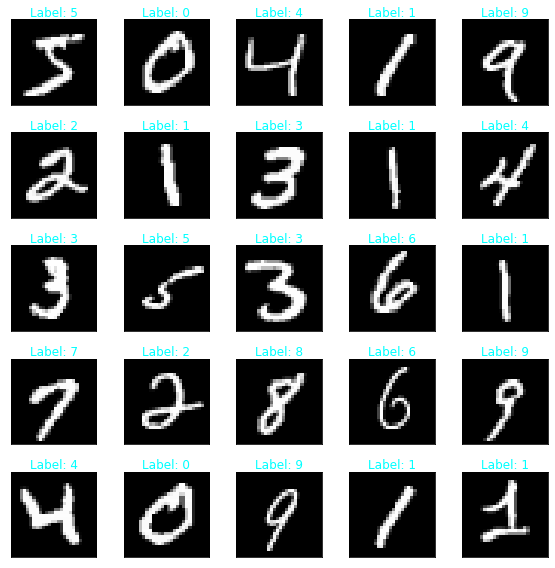

In [3]:
import numpy as np
fig,axs = plt.subplots(5,5,figsize=(8,8))
i = 0

for ax in axs.ravel():
  img = np.array(x_train[i],dtype="uint8")
  img = img.reshape(28,28)
  ax.set_title("Label: " + str(y_train[i]),pad=0.5, loc='center',color='cyan'  )
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.imshow(img, cmap='gray')
  i = i + 1

plt.tight_layout()

## Normalize data
Q1 B

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print(type(x_train))
print("X_Origninal", x_train[0])
x_train /= 255
x_test /= 255
print("X_Scaled", x_train[0])
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


<class 'numpy.ndarray'>
X_Origninal [[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 

## Q3 (1) Reshape the data 


In [5]:
  print("before reshape :")
  print("x_train : ",x_train.shape)
  print("x_test : ",x_test.shape)
  x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
  x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)
  print("after reshape :")
  print("x_train: ",x_train.shape)
  print("x_test: ",x_test.shape)

before reshape :
x_train :  (60000, 28, 28)
x_test :  (10000, 28, 28)
after reshape :
x_train:  (60000, 784)
x_test:  (10000, 784)


### Q3 (2) Print before and after converting labels to categorical

In [6]:
# convert class vectors to binary class matrices
print("Class label of first image: ", y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
print("Class label of first image after converting to categorical: ", y_train[0])
y_test = keras.utils.to_categorical(y_test, num_classes)

Class label of first image:  5
Class label of first image after converting to categorical:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Q4. Build basic Single Layer Perceptron on the MNIST Data. 

In [7]:
slp_model = Sequential()
slp_model.add(InputLayer(input_shape=(784,)))
slp_model.add(Dense(1024, kernel_initializer='glorot_normal', activation='relu'))
slp_model.add(Dense(units=10, activation='softmax'))
slp_model.summary()
keras.utils.plot_model(slp_model, "my_slp_model.png",show_shapes=True)

slp_model.compile(loss='categorical_crossentropy', # Cross-entropy 
          optimizer=keras.optimizers.rmsprop(learning_rate=0.0001), # rmsprop optimizer lr=1e-3
          metrics=['accuracy']) # Accuracy performance metric

history = slp_model.fit(x_train, y_train, batch_size=5000, epochs=50, validation_split=0.2)
print("Trained values for: ")
print("  loss: ",history.history['loss'][-1])
print("  acc: ",history.history['accuracy'][-1])

print("Evaluation values for:")
score = slp_model.evaluate(x_test, y_test, verbose=0)
print(' loss:', score[0])
print(' accuracy:', score[1])


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 1s 13us/step - loss: 1.9444 - accuracy: 0.5122 - val_loss: 1.6021 - val_accuracy: 0.7423
Epoch 2/50
48000/48000 [==============================] - 0s 5us/step - loss: 1.4507 - accuracy: 0.7652 - val_loss: 1.2401 - val_accuracy: 0.8096
Epoch 3/50
48000/48000 [==============================] - 0s 4us/step - loss: 1.1477 

##Q5. Build basic Multi Layer Perceptron on the MNIST Data. 

In [8]:
mlp_model = Sequential()
mlp_model.add(InputLayer(input_shape=(784,)))
mlp_model.add(Dense(1024, kernel_initializer='glorot_normal', activation='relu'))
mlp_model.add(Dense(512, kernel_initializer='glorot_normal', activation='relu'))
mlp_model.add(Dense(512, kernel_initializer='glorot_normal', activation='relu'))
mlp_model.add(Dense(units=10, activation='softmax'))
mlp_model.summary()
keras.utils.plot_model(mlp_model, "my_mlp_model.png",show_shapes=True)

mlp_model.compile(loss='categorical_crossentropy', # Cross-entropy 
          optimizer=keras.optimizers.rmsprop(learning_rate=0.0001), # rmsprop optimizer lr=1e-3
          metrics=['accuracy']) # Accuracy performance metric

history = mlp_model.fit(x_train, y_train, batch_size=5000, epochs=50, validation_split=0.2)
print("Trained values for: ")
print("  loss: ",history.history['loss'][-1])
print("  acc: ",history.history['accuracy'][-1])

print("Evaluation values for:")
score = mlp_model.evaluate(x_test, y_test, verbose=0)
print(' loss:', score[0])
print(' accuracy:', score[1])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,596,426
Trainable params: 1,596,426
Non-trainable params: 0
_________________________________________________________________
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 0s 8us/step - loss: 1.8203 - accuracy: 0.6191 - val_loss: 1.2428 - val_accuracy: 0.8077
Epoch 2/50
48000/48000 [======================

## Q6 (A) Build basic Convolution neural network on the MNIST Data. 

In [9]:
# Reshape the Data
print("before reshape :")
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
print("after reshape :")
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)

before reshape :
x_train :  (60000, 784)
x_test :  (10000, 784)
after reshape :
x_train:  (60000, 28, 28, 1)
x_test:  (10000, 28, 28, 1)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


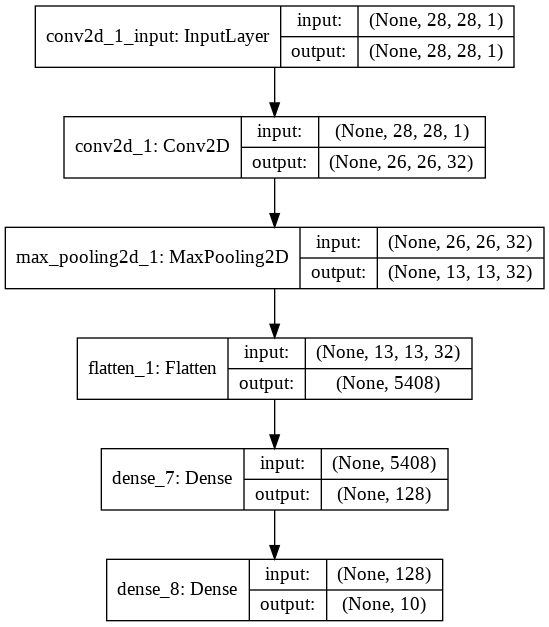

In [10]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,input_shape=(28,28,1),kernel_size=(3,3),strides=(1,1),activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))
cnn_model.summary()
keras.utils.plot_model(cnn_model,'my_cnn_model.png', show_shapes=True)

## Q6. (B) Save the model into Json and .h5 file

In [11]:
from keras.models import model_from_json
model_json = cnn_model.to_json()
with open('model.json','w') as f:
  f.write(model_json)

cnn_model.save_weights('model_try.h5')
print("Model saved to model.json, and weights saved to model_try.h5")


Model saved to model.json, and weights saved to model_try.h5


##Q6. (C) Load the model from disk

Loading model.json....
..Ok
Loading model_try.h5....
..Ok
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


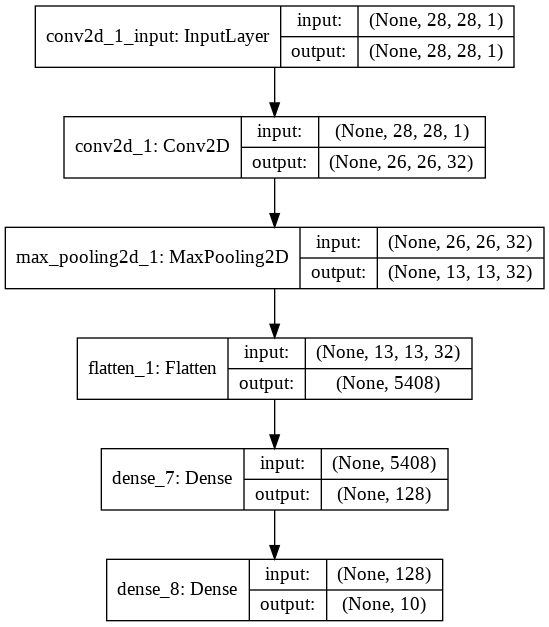

In [12]:
print("Loading model.json....")
f = open('model.json','r')
new_loaded_model = model_from_json(f.read())
f.close()
print("..Ok")

print("Loading model_try.h5....")
new_loaded_model.load_weights('model_try.h5')
print("..Ok")
new_loaded_model.summary()
keras.utils.plot_model(cnn_model,'my_loaded_cnn_model.png', show_shapes=True)